Taller 3

-James Uribe

-Juan Francisco Torres

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller

Punto 1

In [161]:
##CATERPILLAR
precios_CAT=yf.download("CAT",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_CAT=np.log(precios_CAT/precios_CAT.shift()).dropna()

##HOME DEPOT 
precios_HD=yf.download("HD",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_HD=np.log(precios_HD/precios_HD.shift()).dropna()

##VERIZON
precios_VZ=yf.download("VZ",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_VZ=np.log(precios_VZ/precios_VZ.shift()).dropna()

##INTEL CORP
precios_INTC=yf.download("INTC",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_INTC=np.log(precios_INTC/precios_INTC.shift()).dropna()

##JP MORGAN
precios_JPM=yf.download("JPM",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_JPM=np.log(precios_JPM/precios_JPM.shift()).dropna()

##Indice Dow Jones
p_indice=yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
r_indice=np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [162]:
##Retornos esperados 
re_CAT=pd.DataFrame([np.mean(retornos_CAT)])
re_HD=pd.DataFrame([np.mean(retornos_HD)])
re_VZ=pd.DataFrame([np.mean(retornos_VZ)])
re_INTC=pd.DataFrame([np.mean(retornos_INTC)])
re_JPM=pd.DataFrame([np.mean(retornos_JPM)])

In [163]:
##Volatilidades
sigma_CAT=np.std(retornos_CAT)
sigma_HD=np.std(retornos_HD)
sigma_VZ=np.std(retornos_VZ)
sigma_INTC=np.std(retornos_INTC)
sigma_JPM=np.std(retornos_JPM)

In [164]:
X = r_indice

In [165]:
Y_CAT = retornos_CAT
Y_HD = retornos_HD
Y_VZ = retornos_VZ
Y_INTC = retornos_INTC
Y_JPM = retornos_JPM


In [ ]:
CAPM_CAT = sm.OLS(Y_CAT, sm.add_constant(X)).fit()
print(CAPM_CAT.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     57.11
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           3.39e-10
Time:                        23:53:21   Log-Likelihood:                 80.284
No. Observations:                  60   AIC:                            -156.6
Df Residuals:                      58   BIC:                            -152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.008      0.388      0.6

In [ ]:
CAPM_HD = sm.OLS(Y_HD, sm.add_constant(X)).fit()
print(CAPM_HD.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     52.17
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.24e-09
Time:                        23:53:21   Log-Likelihood:                 93.247
No. Observations:                  60   AIC:                            -182.5
Df Residuals:                      58   BIC:                            -178.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.007      0.892      0.3

In [ ]:
CAPM_VZ = sm.OLS(Y_VZ, sm.add_constant(X)).fit()
print(CAPM_VZ.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     12.21
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           0.000919
Time:                        23:53:21   Log-Likelihood:                 101.51
No. Observations:                  60   AIC:                            -199.0
Df Residuals:                      58   BIC:                            -194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.006     -0.510      0.6

In [ ]:
CAPM_INTC = sm.OLS(Y_INTC, sm.add_constant(X)).fit()
print(CAPM_INTC.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     23.73
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           8.95e-06
Time:                        23:53:21   Log-Likelihood:                 75.039
No. Observations:                  60   AIC:                            -146.1
Df Residuals:                      58   BIC:                            -141.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.009     -1.211      0.2

In [ ]:
CAPM_JPM = sm.OLS(Y_JPM, sm.add_constant(X)).fit()
print(CAPM_JPM.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.20e-15
Time:                        23:53:21   Log-Likelihood:                 98.836
No. Observations:                  60   AIC:                            -193.7
Df Residuals:                      58   BIC:                            -189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.006      0.041      0.9

In [ ]:
##Betas
beta_CAT = CAPM_CAT.params[1]
beta_HD = CAPM_HD.params[1]
beta_VZ = CAPM_VZ.params[1]
beta_INTC = CAPM_INTC.params[1]
beta_JPM = CAPM_JPM.params[1]

In [ ]:
##Retornos estimados
rf = 0
re_CAPM_CAT = re_CAT + beta_CAT * (r_indice.mean() - rf)
re_CAPM_HD = re_HD + beta_HD * (r_indice.mean() - rf)
re_CAPM_VZ = re_VZ + beta_VZ * (r_indice.mean() - rf)
re_CAPM_INTC = re_INTC + beta_INTC * (r_indice.mean() - rf)
re_CAPM_JPM = re_JPM + beta_JPM * (r_indice.mean() - rf)


In [ ]:
##Coeficientes de determinacion
rcuadrado_CAT = CAPM_CAT.rsquared
rcuadrado_HD = CAPM_HD.rsquared
rcuadrado_VZ = CAPM_VZ.rsquared
rcuadrado_INTC = CAPM_INTC.rsquared
rcuadrado_JPM = CAPM_JPM.rsquared

In [ ]:
r_esperado = pd.DataFrame({"r_esperado" : [re_CAT, re_HD, re_VZ, re_INTC, re_JPM]})
sigma = pd.DataFrame({"sigma" : [re_CAT, re_HD, re_VZ, re_INTC, re_JPM]})

In [ ]:
results = pd.DataFrame({
    "retorno esperado" : [re_CAT, re_HD, re_VZ, re_INTC, re_JPM],
    "sigma" : [sigma_CAT, sigma_HD, sigma_VZ, sigma_INTC, sigma_JPM],
    'Beta': [beta_CAT, beta_HD, beta_VZ, beta_INTC, beta_JPM],
    'Retorno estimado': [re_CAPM_CAT, re_CAPM_HD, re_CAPM_VZ, re_CAPM_INTC, re_CAPM_JPM],
    'Coeficiente de determinación': [rcuadrado_CAT, rcuadrado_HD, rcuadrado_VZ, rcuadrado_INTC, rcuadrado_JPM]
})
acciones = ["CAT", "HD", "VZ", "INTC", "JPM"]
results.index = acciones
results.index.name = "Acción"
results

,retorno esperado,sigma,Beta,Retorno estimado,Coeficiente de determinación
Acción,,,,,
CAT,0 0 0.009042,0.089432,1.184948,0 0 0.014836,0.496135
HD,0 0 0.01048,0.070492,0.912512,0 0 0.014942,0.473561
VZ,0 0 -0.001116,0.049034,0.384591,0 0 0.000765,0.173852
INTC,0 0 -0.006984,0.082239,0.833532,0 0 -0.002908,0.290315
JPM,0 0 0.006188,0.079582,1.213558,0 0 0.012122,0.657160


Punto 1b

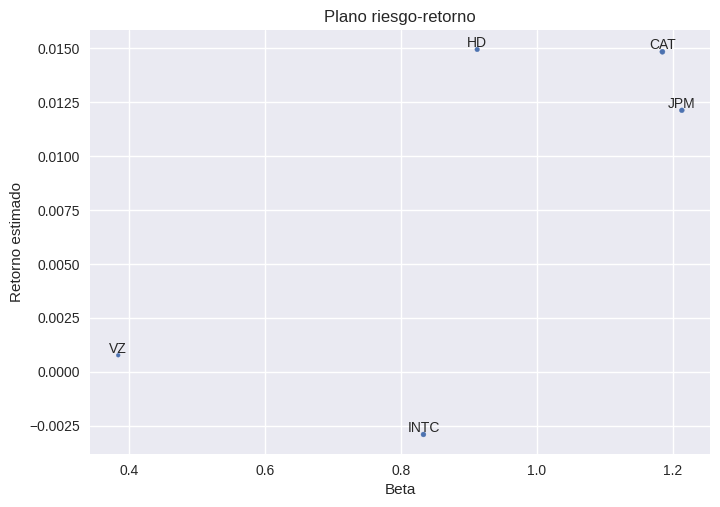

In [166]:
plt.style.use('seaborn')
plt.scatter(results['Beta'], results['Retorno estimado'], s=results['sigma']*150, alpha= 1)

for i, txt in enumerate(results.index):
    plt.annotate(txt, (results['Beta'][i], results['Retorno estimado'][i]), textcoords="offset points", xytext=(0,2), ha='center')

plt.xlabel('Beta')
plt.ylabel('Retorno estimado')
plt.title('Plano riesgo-retorno')

plt.show()

Punto 2

In [176]:
acciones = ["MCD", "MSFT", "JNJ", "NKE", "V"]
precios = yf.download(acciones, start="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]

[*********************100%***********************]  5 of 5 completed


In [177]:
retornos = np.log(precios / precios.shift(1)).dropna()
cov = retornos.cov()

In [178]:
def ratio_sharpe(pesos, retornos, cov):
    retorno_p = np.dot(retornos.mean(), pesos) * 12
    volatilidad_p = np.sqrt(np.dot(pesos.T, np.dot(cov, pesos))) * np.sqrt(12)
    ratio_sharpe = retorno_p / volatilidad_p
    return -ratio_sharpe

In [179]:
bounds = [(0, 1) for i in range(len(acciones))]
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [180]:
pesos_0 = np.array([1 / len(acciones) for i in range(len(acciones))])
resultado = minimize(ratio_sharpe, pesos_0, args=(retornos, cov), method='SLSQP', bounds=bounds, constraints=constraints)

In [181]:
pesos_optimos = resultado.x

Punto 2a

<BarContainer object of 5 artists>

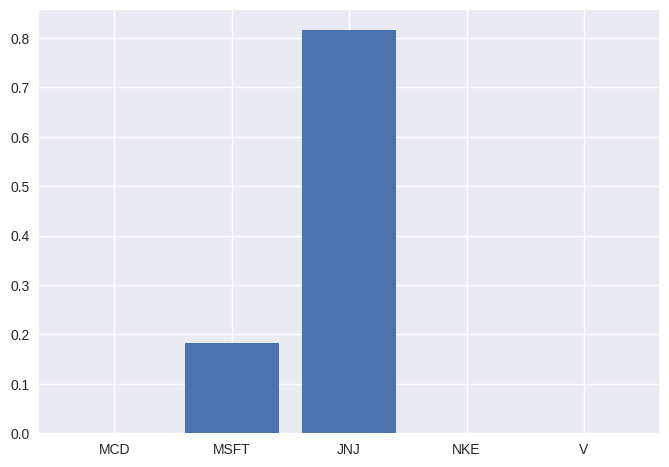

In [182]:
plt.bar(acciones, height=pesos_optimos)

In [183]:
retorno_portafolio = np.dot(pesos_optimos, retornos.mean())
retorno_portafolio

0.016510631156638433

In [184]:
sigma_portafolio = np.sqrt(np.dot(np.dot(pesos_optimos.T, cov), pesos_optimos))
sigma_portafolio

0.055000998214378205

  Punto 2b

In [185]:
mu_p = np.dot(retornos.mean(), pesos_optimos)
sigma_p = np.sqrt(np.dot(np.dot(pesos_optimos.T, cov), pesos_optimos))

In [186]:
alpha = 0.95
z_alpha = norm.ppf(alpha)
VaR_95 = -mu_p - z_alpha*sigma_p

In [187]:
alpha = 0.99
z_alpha = norm.ppf(alpha)
VaR_99 = -mu_p - z_alpha*sigma_p

In [188]:
print("VaR al 95% de confianza:", VaR_95)
print("VaR al 99% de confianza:", VaR_99)

VaR al 95% de confianza: -0.10697922255550987
VaR al 99% de confianza: -0.14446208642278124


Punto 2c

In [193]:
retornos_portafolio = np.dot(retornos, pesos_optimos)
alpha = 0.95
dias = 252 
retornos_portafolio_ordenados = np.sort(retornos_portafolio)
VaR_95_hist = -np.percentile(retornos_portafolio_ordenados, alpha*100)*np.sqrt(dias)

In [194]:
alpha = 0.99
VaR_99_hist = -np.percentile(retornos_portafolio_ordenados, alpha*100)*np.sqrt(dias)

print("VaR histórico para un nivel de confianza del 95%:", VaR_95_hist)
print("VaR histórico para un nivel de confianza del 99%:", VaR_99_hist)

VaR histórico para un nivel de confianza del 95%: -1.4406672270005347
VaR histórico para un nivel de confianza del 99%: -2.078582224109266


Punto 2d

In [189]:
n_simulaciones = 10000
pesos_simulados = np.random.dirichlet(np.ones(len(retornos.columns)), n_simulaciones)

In [195]:
rets_simulados = np.dot(retornos, pesos_simulados.T)
vol_simulados = np.sqrt(np.diag(np.dot(np.dot(pesos_simulados, cov), pesos_simulados.T)))

In [208]:
alpha = 0.95
alpha2 = 0.99
VaR_MC = np.percentile(-ret_simulados, alpha*100)
VaR_MC2 = np.percentile(-ret_simulados, alpha2*100)

In [209]:
print(f"VaR de simulación para un nivel de confianza del 95%: {VaR_MC:.4f}")
print(f"VaR de simulación para un nivel de confianza del 99%: {VaR_MC2:.4f}")

VaR de simulación para un nivel de confianza del 95%: 0.0773
VaR de simulación para un nivel de confianza del 99%: 0.1079


Punto 2e

In [ ]:
##Si se encuentran diferencias significativas entre el VaR parametrico y el VaR de simulación, esto debido a que el VaR parametrico no alcanza a capturar la complejidad 
##de la distribución de rendimientos. La simulación Monte Carlo, por otro lado, no tiene estas restricciones y puede ser más flexible para capturar la complejidad de la 
##distribución de rendimientos.

Punto 3

In [200]:
retornos=np.log(precios_CAT/precios_CAT.shift()).dropna()
mu=retornos_CAT.mean()*12
sigma=retornos_CAT.std()*np.sqrt(12)
precios_CAT.mean()

155.87549978787783

Punto 3a

[*********************100%***********************]  1 of 1 completed


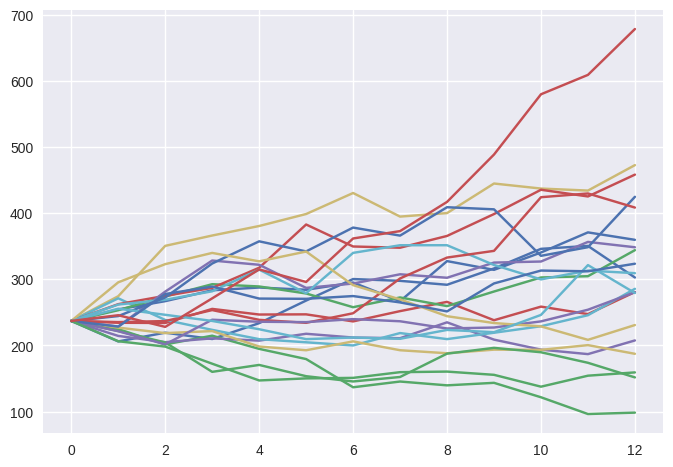

In [227]:
precios=yf.download("CAT",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
def PathsGBM(S0,mu,sigma,T,NS,M):
  Z=np.random.normal(0.0,1.0,[NS,M])
  S=np.zeros([NS,M+1])
  S[:,0]=S0
  dt=T / M
  for t in range (0,M):
    S[:,t+1]=S[:,t]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z[:,t])
  return S
T=1
S0=precios[-1]
M=12
NS=10000
St=PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St[0:21,:]));

Punto 3b

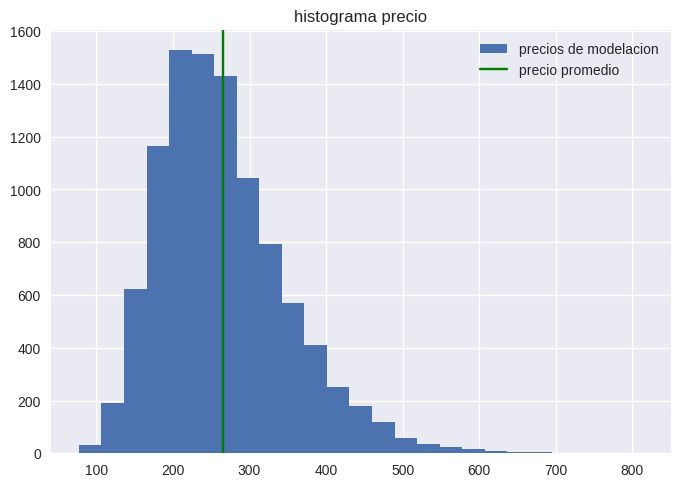

In [228]:
plt.hist(St[:,-1],bins=25,label="precios de modelacion");
plt.axvline(St[:,-1].mean(),color="g", label="precio promedio")
plt.title("histograma precio")
plt.legend()

In [ ]:
##La distribucion de los precios se encuentra sesgada a la izquierda y presenta muchos valores atipicos en precios altos.

In [238]:
retornos = np.log(St[1:,:] / St[:-1,:])

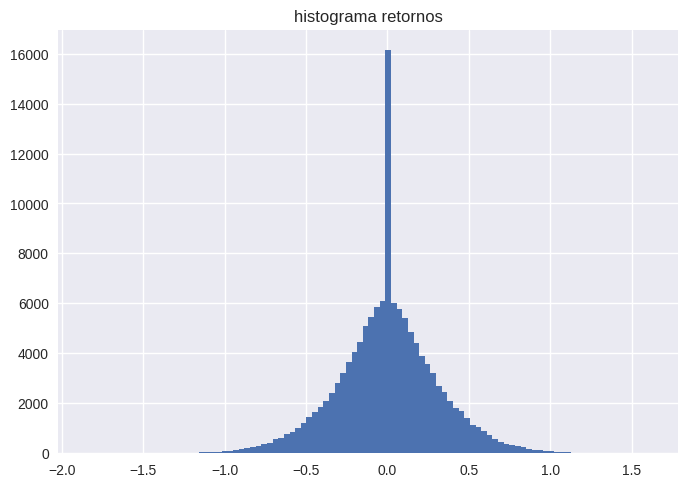

In [244]:
plt.hist(retornos.flatten(), bins=100, label="retornos de modelación")
plt.title("histograma retornos")
plt.show()

In [ ]:
##La distribución de los retornos se parece a una distribucion normal pero presenta una muy alta densidad en la media.

Punto 3c

In [206]:
Stexp=(S0*np.exp(mu*T))
valorprsimulado=St[:,-1].mean()
a=Stexp-valorprsimulado
print(" el precio simulado de la accion es de", valorprsimulado, "y de ST exp{μ T} es de",Stexp , "lo que quiere decir que el valor del precio simulado de la acción en T converge a ST exp{μ T}.")

 el precio simulado de la accion es de 263.154179674977 y de ST exp{μ T} es de 264.31420584808427 lo que quiere decir que el valor del precio simulado de la acción en T converge a ST exp{μ T}.


Punto 3d

In [207]:
preciosim1=St[:,-1]
pnegativo=len(preciosim1[preciosim1<S0])/NS
print("la probabilidad de que el precio de la acción sea inferior a S0 es del", pnegativo*100,"%")

la probabilidad de que el precio de la acción sea inferior a S0 es del 42.65 %


Punto 4

In [245]:
def PathsOU (X0,mu,sigma,T,NS,M):
  Z=np.random.normal(0.0,1.0,[NS,M])
  X=np.zeros([NS,M+1])
  X[:,0]=X0
  dt=T / M
  c=1
  std_dt=np.sqrt(sigma*2/(2*c)*(1-np.exp(-2*c*dt)))
  for t in range (0,M):
    X[:, t + 1] = X[:, t] + (mu - X[:, t]) * dt + sigma * np.sqrt(dt) * Z[:, t]
  return X

Punto 4a

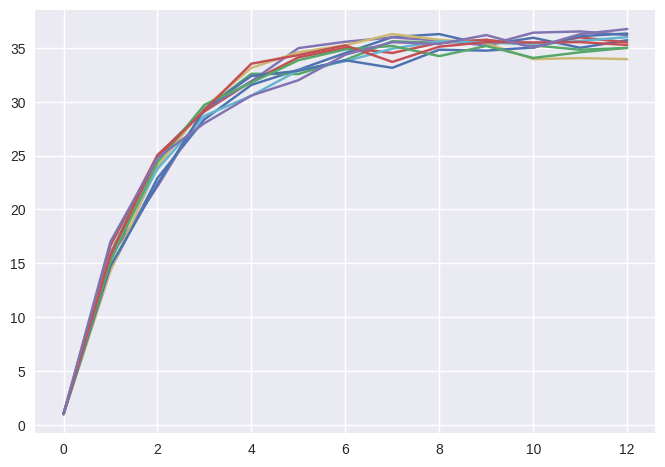

In [246]:
X0=1
T=5
mu=3*12
sigma=0.3*np.sqrt(12)
NS=100
M=12
Xt=PathsOU(X0,mu,sigma,T,NS,M)
Xt
plt.plot(np.transpose(Xt[0:10,:]))

Punto 4b

In [ ]:
#Se espera que el valor incremente rapidamente el los primeros periodos para al final estabilizarse en un valor cercano a 35

Punto 4c

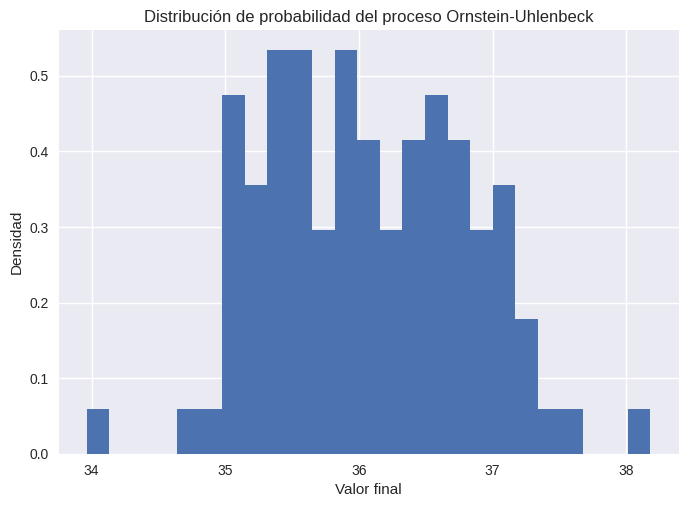

el valor esperado y la varianza del activo convergen a valores estables en el tiempo, pero la distribución de probabilidad en sí no es estacionaria. Por lo tanto, el proceso OU no se puede describir completamente mediante una única distribución de probabilidad.


In [247]:
plt.hist(Xt[:, -1], bins=25, density=True)
plt.title('Distribución de probabilidad del proceso Ornstein-Uhlenbeck')
plt.xlabel('Valor final')
plt.ylabel('Densidad')
plt.show()
print("el valor esperado y la varianza del activo convergen a valores estables en el tiempo, pero la distribución de probabilidad en sí no es estacionaria. Por lo tanto, el proceso OU no se puede describir completamente mediante una única distribución de probabilidad.")

Punto 4d

In [248]:
#d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa
#corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado,
#esta se puede modelar como:
r0=0.03
mu=0.05
sigma=0.15
NS=100
dt=T/M

In [249]:
# Parámetros
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 100
dt = T/m

In [250]:
r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range(NS):
    for j in range(m):
        dW = np.random.normal(0, np.sqrt(dt), 1)
        r[i,j+1] = r[i,j] + (mu-r[i,j])*dt + sigma*dW

In [251]:
# Valoración del bono cero cupón
B = np.exp(-r[:, -1]*T)
V0 = np.mean(B)*100

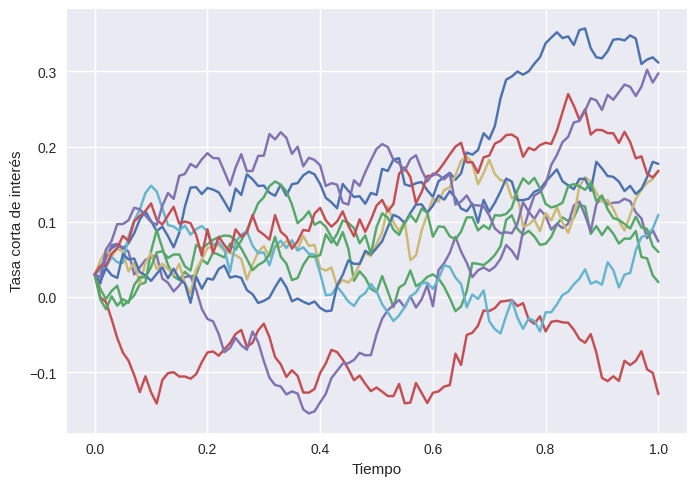

Valor del bono cero cupón: 94.69369499415268


In [252]:
# Gráfico de las primeras 10 trayectorias
plt.plot(np.arange(m+1)*dt, r[:10,:].T)
plt.xlabel('Tiempo')
plt.ylabel('Tasa corta de interés')
plt.show()

print('Valor del bono cero cupón:', V0)

Punto 5

In [261]:
##US Treasury Bill
precios_USTB = yf.download("^IRX",start="2003-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_USTB = np.log(precios_USTB/precios_USTB.shift()).dropna()

##Natural gas
precios_NG = yf.download("NG=F",start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_NG = np.log(precios_NG/precios_NG.shift()).dropna()

##Gold futures
precios_GC = yf.download("GC=F",start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_GC = np.log(precios_GC/precios_GC.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Punto 5a

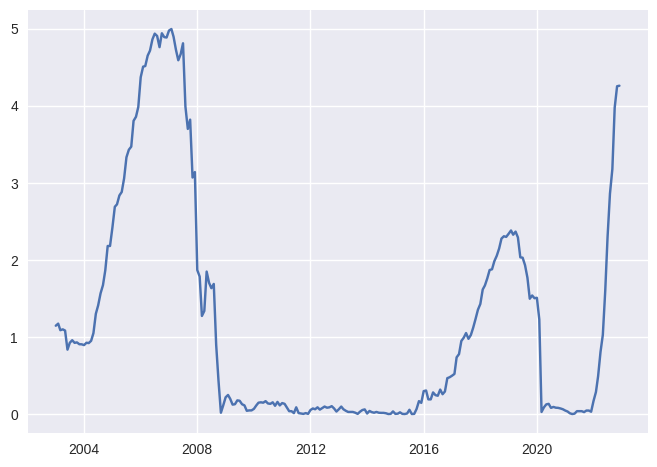

In [262]:
##US Treasury Bonds
plt.plot(precios_USTB)

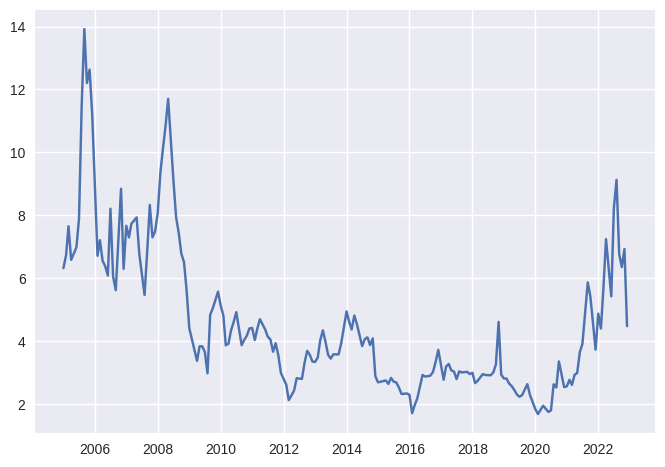

In [263]:
##Natural gas
plt.plot(precios_NG)

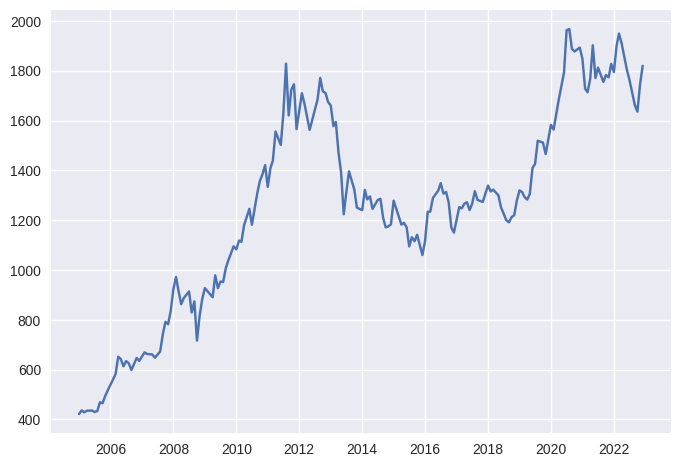

In [264]:
##Gold Futures
plt.plot(precios_GC)

Punto 5b

In [265]:
##US Treasury Bonds 
pruebadf1 = adfuller(precios_USTB)
print("ADF test: %f" % pruebadf1[0])
print("P-value %f" % pruebadf1[1])
print("Critical values:")
for key, value in pruebadf1[4].items():
  print("t%s: %f" %(key,value))   ##No estacionaria

ADF test: -2.063726
P-value 0.259348
Critical values:
t1%: -3.458608
t5%: -2.873972
t10%: -2.573396


In [266]:
##Natural gas
pruebadf1 = adfuller(precios_NG)
print("ADF test: %f" % pruebadf1[0])
print("P-value %f" % pruebadf1[1])
print("Critical values:")
for key, value in pruebadf1[4].items():
  print("t%s: %f" %(key,value))  ##No estacionaria (a un nivel de significancia del 1%)

ADF test: -3.157328
P-value 0.022591
Critical values:
t1%: -3.468280
t5%: -2.878202
t10%: -2.575653


In [267]:
##Gold Futures
pruebadf1 = adfuller(precios_GC)
print("ADF test: %f" % pruebadf1[0])
print("P-value %f" % pruebadf1[1])
print("Critical values:")
for key, value in pruebadf1[4].items():
  print("t%s: %f" %(key,value))   ##No estacionaria

ADF test: -1.606097
P-value 0.480530
Critical values:
t1%: -3.466398
t5%: -2.877380
t10%: -2.575214


Punto 5c

In [258]:
def PathsGBM(s0,mu,sigma,T,NS,M):
  Z = np.random.normal(0.0,1.0,[NS,M])
  S = np.zeros([NS, M+1])
  S[:,0] =S0
  dt = T / M
  for t in range(0,M):
    S[:, t+1] = S[:,t] *np.exp((mu - 0.05 * sigma **2) * dt + sigma * np.sqrt(dt) *Z[:,t])
  return S

In [270]:
#US Treasury Bonds
T = 1
mu = retornos_USTB.mean()
sigma = retornos_USTB.std()*np.sqrt(12)
S0 = 4.260000228881836
NS = 100
M = 1
St1 = PathsGBM(S0,mu,sigma,T,NS,M) 

In [271]:
St1[:,-1].mean()

104.74920583370529

In [272]:
#Natural Gas
T = 1
mu = retornos_NG.mean()
sigma = retornos_NG.std()*np.sqrt(12)
S0 = 4.260000228881836
NS = 100
M = 1
St2 = PathsGBM(S0,mu,sigma,T,NS,M) 

In [273]:
St2[:,-1].mean()

5.012682164125149

In [274]:
#Gold Futures
T = 1
mu = retornos_GC.mean()
sigma = retornos_GC.std()*np.sqrt(12)
S0 = 4.260000228881836
NS = 100
M = 1
St3 = PathsGBM(S0,mu,sigma,T,NS,M) 

In [275]:
St3[:,-1].mean()

4.423943959006216